<a href="https://colab.research.google.com/github/Thandiwe-Khalaki/load-shortfall-regression-predict-api/blob/master/G15_All_components_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy


### Predict Overview: Spain Electricity Shortfall Challenge




**Backgroud - flesh out 

Overview 

**Objective**
- Explore the provided dataset
- Clean the data
- Engineer new features 
- Build an accurate regression model


**Personalise**


**Picture**

**Context** 

**Aim**

The aim here is to complete four tasks
- Notebook analysis
- Using the trained model to participate in the Kaggle competition
- Deploy the trained model on a Flask websever with the help of AWS
- Presentation of modeling process, findings and results 


Train / Predict format













The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [ ]:
# Libraries for data loading, data manipulation and data visulisation
#!pip install xgboost
%matplotlib inline
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
import matplotlib.dates as dates

from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV 

# Libraries for data preparation and model building
from sklearn import linear_model

from math import sqrt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
df_train = pd.read_csv('./df_train.csv', parse_dates=['time'],infer_datetime_format=True)
df_test = pd.read_csv('./df_test.csv', parse_dates=['time'],infer_datetime_format=True)
df = pd.concat([df_train,df_test])

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>




Consider pre prosessing before the EDA




In [ ]:
#view the first 5 rows of the data
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

We have weather data for five cities of Spain: **Madrid, Valencia, Seville, Bilbao, Barcelona**

The weather categories in the dataset include:
<br> - **wind_speed** and **wind_degree** Valencia wind degree is categorical 1-10 and other cities are between 1-360 degrees
<br> - **rain_1h** and **rain_3h**
<br> - **humidity**
<br> - **clouds_all**
<br> - **pressure**
<br> - **snow_3h**
<br> - **weather_id**: A metric used to explain the weather condition of a specific city at a specified time
<br> - **temp_max, temp_min** and **temp**

Our target variable is **load_shortfall_3h**: The difference between the energy generated by the method of renewable energy sources, such as solar, wind, geothermal, etc., and energy generated with fossil fuels - partitioned in three-hour windows

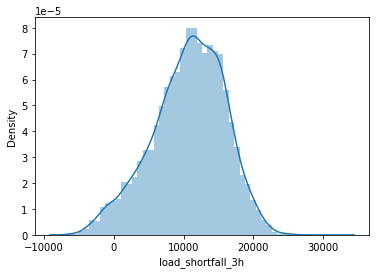

In [ ]:
#Graph showing the discribution load_shortfall_3h
x = df['load_shortfall_3h']
ax = sns.distplot(x, kde=True)

The load_shortfall_3h is basically normally distributed, but its left tail seems to exhibit a hitch. We will make predictions with several techniques to see which one(s) deal(s) with the non-normality in the distribution.

In [ ]:
# get the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            11683 non-null  int64         
 1   time                  11683 non-null  datetime64[ns]
 2   Madrid_wind_speed     11683 non-null  float64       
 3   Valencia_wind_deg     11683 non-null  object        
 4   Bilbao_rain_1h        11683 non-null  float64       
 5   Valencia_wind_speed   11683 non-null  float64       
 6   Seville_humidity      11683 non-null  float64       
 7   Madrid_humidity       11683 non-null  float64       
 8   Bilbao_clouds_all     11683 non-null  float64       
 9   Bilbao_wind_speed     11683 non-null  float64       
 10  Seville_clouds_all    11683 non-null  float64       
 11  Bilbao_wind_deg       11683 non-null  float64       
 12  Barcelona_wind_speed  11683 non-null  float64       
 13  Barcelona_wind_de

All of the variables are numeric (float64) except for 
<br> 1) Time - imported in datetime64[ns] format from CSV
<br> 2) Valencia_wind_deg and Seville_pressure, which are objects (categorical data).

This command also shows us that out of the 8763 rows in our dataset per feature only one of the features contain null values (missing data): Valencia_pressure.

### 3.1  Look at data statistics


In [ ]:
# Print out column names to use in the EDA and preprocessing 
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [ ]:
# look at the statistics of the dataframe
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,9161.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,5841.000000,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,187.654241,20.668692,2.483067,0.108534,0.041120,0.023936,1.287326e+03,0.000182,0.043328,0.000331,0.000154,769.851665,764.603446,1017.482011,774.050843,1012.346687,296.007363,1011.797412,291.362722,290.788513,727.800750,293.170948,65.091814,290.229939,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,3372.735932,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,88.694717,28.478087,1.705508,0.556794,0.180425,0.482817,1.218906e+04,0.003171,0.163996,0.003466,0.010277,81.914258,90.736191,9.753552,72.909418,8.817473,8.929160,19.983122,7.441278,7.157835,113.616789,7.998774,19.040927,7.003619,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2920.500000,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,116.666667,0.000000,1.000000,0.000000,0.000000,0.000000,1.013667e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.333333,800.000000,1010.666667,289.483333,1012.666667,285.783333,285.395500,701.000000,287.403167,51.333333,284.928833,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,5841.000000,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,193.333333,0.000000,2.000000,0.000000,0.000000,0.000000,1.017333e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1018.666667,800.000000,1015.000000,295.483333,1017.333333,291.150000,290.483333,800.000000,292.470000,66.333333,289.820000,290.150000,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,8761.500000,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,3.666667,260.000000,38.333333,3.333333,0.000000,0.000000,0.000000,1.021167e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1023.333333

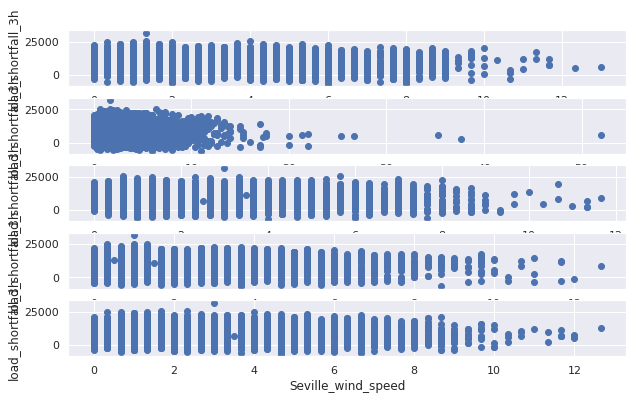

In [ ]:
# scatteplot showing different wind speed(s) in the dataframe
fig, axes = plt.subplots(5, figsize=(10, 6))

axes[0].scatter(x = df['Madrid_wind_speed'], y = df['load_shortfall_3h'])
axes[0].set_xlabel('wind_speed')
axes[0].set_ylabel('load_shortfall_3h')

axes[1].scatter(x = df['Valencia_wind_speed'], y = df['load_shortfall_3h'])
axes[1].set_xlabel('Valencia_wind_speed')
axes[1].set_ylabel('load_shortfall_3h')

axes[2].scatter(x = df['Seville_wind_speed'], y = df['load_shortfall_3h'])
axes[2].set_xlabel('Seville_wind_speed')
axes[2].set_ylabel('load_shortfall_3h')

axes[3].scatter(x = df['Bilbao_wind_speed'], y = df['load_shortfall_3h'])
axes[3].set_xlabel('Seville_wind_speed')
axes[3].set_ylabel('load_shortfall_3h')

axes[4].scatter(x = df['Barcelona_wind_speed'], y = df['load_shortfall_3h'])
axes[4].set_xlabel('Seville_wind_speed')
axes[4].set_ylabel('load_shortfall_3h')


plt.show()

The scatterplots  show the different relationships between wind_speed of different cities and load_shortfall_3h. There is no linear relationship between wind speed and load_shortfall_3h

### 3.2 Plot relevant feature interactions

In [ ]:
# set temperature
temp_max = df[['Seville_temp_max','Bilbao_temp_max','Barcelona_temp_max','Valencia_temp_max','Madrid_temp_max']]
temp = df[['Seville_temp','Bilbao_temp','Barcelona_temp','Valencia_temp','Madrid_temp']]
temp_min = df[['Seville_temp_min','Bilbao_temp_min','Barcelona_temp_min','Valencia_temp_min','Madrid_temp_min']]


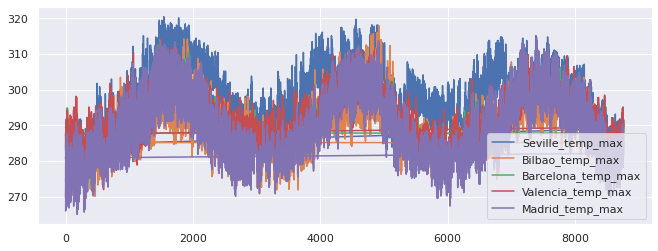

In [ ]:
# find the relationship between different maximum temperatures
temp_max.plot()

The maximum temperatures between the cities have a linear relationship and are correlated

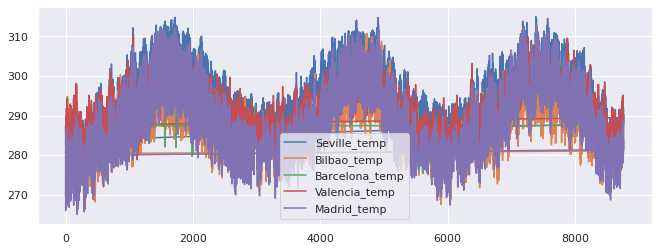

In [ ]:
# find the relationship between different  avarage temperatures
temp.plot()

The different avarage temperatures are correlated, with Seville having the highest avarage temperature

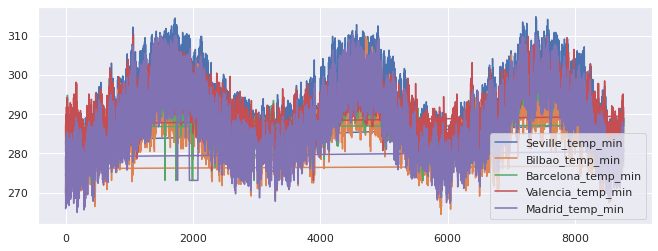

In [ ]:
#find the relationship between different minimum temperatures
temp_min.plot()

The different minimum temparatures are correlated, with seville having the highest minimum temparature

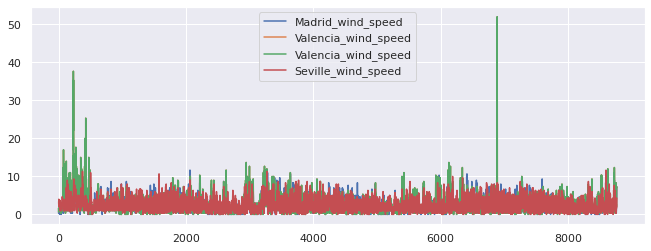

In [ ]:
viz = df_train[['Madrid_wind_speed','Valencia_wind_speed','Valencia_wind_speed','Seville_wind_speed']]
viz.plot()
plt.show()

Valencia has the highest wind speed,seconded by Seville. This shows that these two cities are the mosty windy.

## 3.3 Evaluate correlation

### Feature Engineering - Time

Before doing more EDA, we reate feutures from time such as day and moonth and week to see if this has an effect on model prediction 

In [ ]:
#get year,month,week,days,hours from time column and convert them to int
df_train['year'] = pd.DatetimeIndex(df_train['time']).year
df_train['month'] = pd.DatetimeIndex(df_train['time']).month
df_train['week'] = pd.DatetimeIndex(df_train['time']).week
df_train['weekdays'] = pd.DatetimeIndex(df_train['time']).weekday
df_train['hour'] = pd.DatetimeIndex(df_train['time']).hour

#change the datatype to float, useful for regression
df_train['year']= df_train['year'].astype('int')
df_train['month']= df_train['month'].astype('int')
df_train['week']= df_train['week'].astype('float')
df_train['weekdays']= df_train['weekdays'].astype('int')
df_train['hour']= df_train['hour'].astype('int')

df_train[['year','month','week','weekdays','hour']].head()

,year,month,week,weekdays,hour
0,2015,1,1.0,3,3
1,2015,1,1.0,3,6
2,2015,1,1.0,3,9
3,2015,1,1.0,3,12
4,2015,1,1.0,3,15


In [ ]:
# #corelation between time and load_shortfall
Time = df_train[['year','month','week','weekdays','hour','time','load_shortfall_3h']].corr()
Time

,year,month,week,weekdays,hour,load_shortfall_3h
year,1.000000,-0.001039,-0.012764,1.677021e-03,2.748198e-04,0.131324
month,-0.001039,1.000000,0.975848,1.458431e-04,3.013643e-04,0.199048
week,-0.012764,0.975848,1.000000,-4.752887e-03,3.170587e-04,0.201080
weekdays,0.001677,0.000146,-0.004753,1.000000e+00,6.141191e-07,-0.156510
hour,0.000275,0.000301,0.000317,6.141191e-07,1.000000e+00,0.139285
load_shortfall_3h,0.131324,0.199048,0.201080,-1.565103e-01,1.392854e-01,1.000000


<AxesSubplot:>

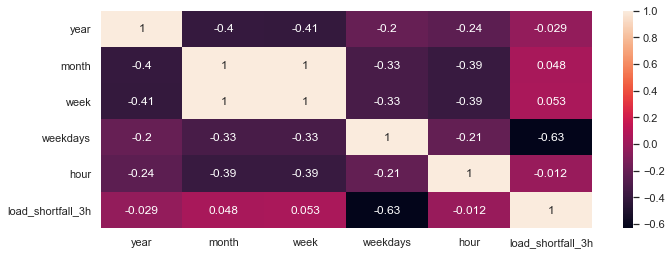

In [ ]:
sns.heatmap(Time.corr(), annot=True)

There is a strong correlation negative between weekdays and load_shortfall_3h, and a perfect correlation between month and week.The hour column has the highest correlated with load_shortfall_3h. This is because the shortfall is measured in hours. The weekends and hour columns also have a high correlation. Because of the high correlation, we are justified to drop one of these columns in our model making.

In [ ]:
wind_speed = df_train[['Madrid_wind_speed','Valencia_wind_speed','Bilbao_wind_speed','Seville_wind_speed','Barcelona_wind_speed','load_shortfall_3h']].corr()


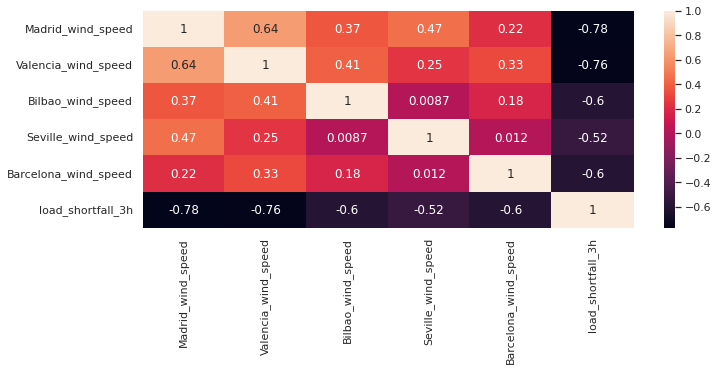

In [ ]:
#
sns.heatmap(wind_speed.corr(), annot= True)

There is a linear relationship between  Valencia_wind_speed and Madrid_wind_speed. Although there are many positive relation between the wind speeds of the different cities, they all have a negative correlation with the target column.

In [ ]:
#correlation between high temperature and load_shortfall
temp_max = df_train[['Seville_temp_max','Bilbao_temp_max','Barcelona_temp_max','Valencia_temp_max','Madrid_temp_max','load_shortfall_3h']].corr()


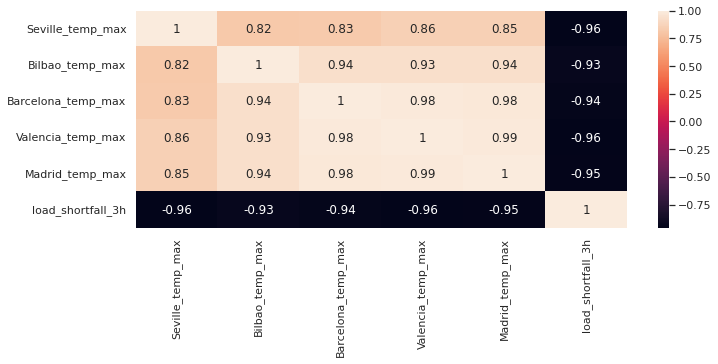

In [ ]:
#heatmap of the maximum temperature
sns.heatmap(temp_max.corr(), annot = True)

Very strong negative colleraltion between max temps for different cities and  load_shortfall_3h. However, a strong correlation exists between the different maximum temparature of the cities.

In [ ]:
# Correalation dataframe of pressure
pressure = df_train[['Seville_pressure','Bilbao_pressure','Barcelona_pressure','Valencia_pressure','Madrid_pressure','load_shortfall_3h']].corr()


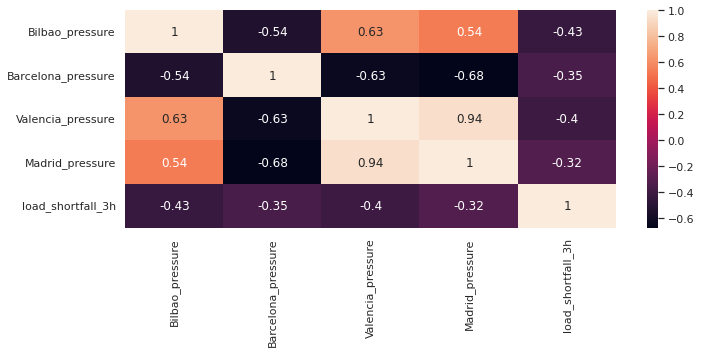

In [ ]:
#heatmap of pressure dataframe
sns.heatmap(pressure.corr(), annot= True)

There is a strong relation between Barcelona_pressure, Madrid_presssure and Valencia_pressure. Also betwee Barcelona_pressure,Valencia_pressure and madrid_pressure. we can drop any one of these columns in order to make our model. Many highly correlated columns tend to confuse the model.

In [ ]:
#avarage temperature dataframe
temp = df_train[['Seville_temp','Bilbao_temp','Barcelona_temp','Valencia_temp','Madrid_temp','load_shortfall_3h']].corr()


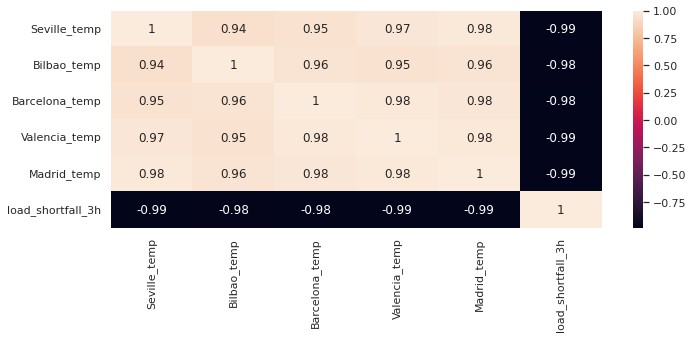

In [ ]:
#heatmap of the avarage temperature
sns.heatmap(temp.corr(), annot = True)

Very strong colleralation between temps for different cities and  load_shortfall_3h

In [ ]:
#correlation between snow and load_shortfall
snow = df_train[['Bilbao_snow_3h','Valencia_snow_3h','load_shortfall_3h']].corr()    

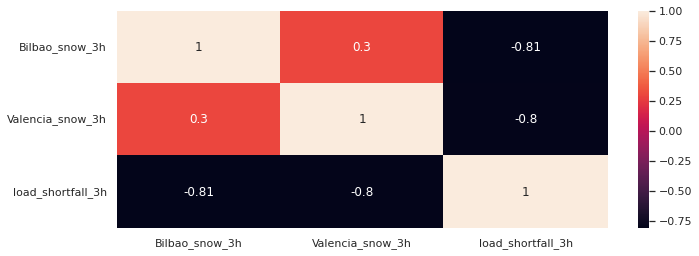

In [ ]:
#heatmap of snow dataframe
sns.heatmap(snow.corr(), annot = True)

There a very high negative correlation between snow and load_shorftall.

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_train['hour'], df_train['load_shortfall_3h'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.13928541804626302  with a P-value of P = 3.2633595181259146e-39


## 3.4 Feature distributions

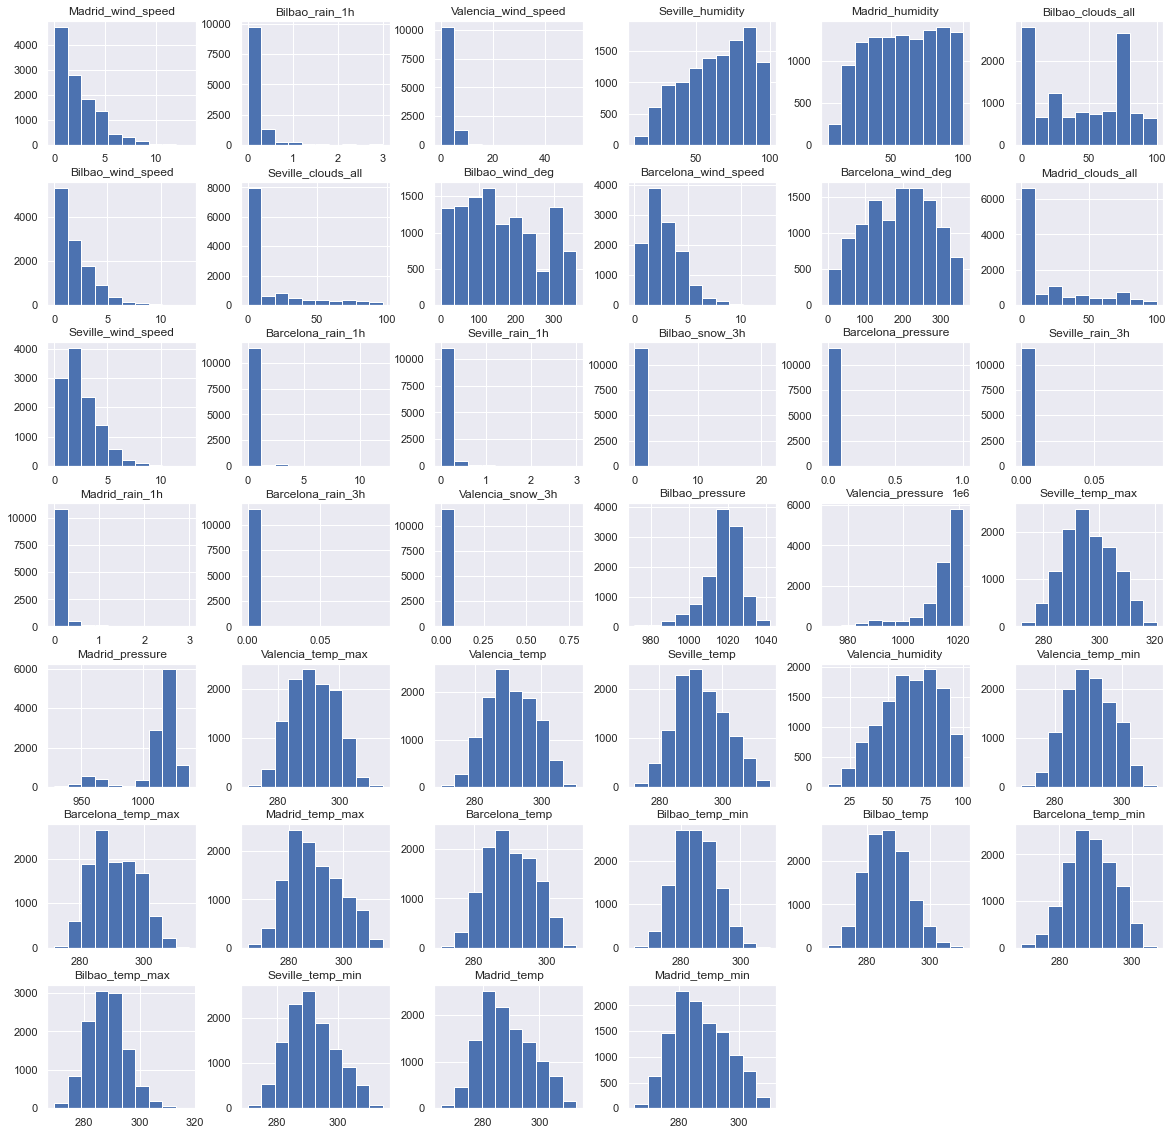

In [ ]:
 # create a list of all numerical features
features = ['Madrid_wind_speed', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Bilbao_pressure',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Seville_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min']
df_clean[features].hist(figsize=(20,20));

**load_shortfall_3h** has NaN values at the end as expected since the test data do not have values for the predictor variable 

### Preprocessing step 

### Dealing with the Object data types 

Pre-processing step: Change the Valencia_wind_deg and Seville_pressure categorical feautures to numerical 

In [ ]:

# First strip out the categorical text 

df['Valencia_wind_deg'] = df['Valencia_wind_deg'].map(lambda x: x.lstrip('level_'))
df['Seville_pressure'] = df['Seville_pressure'].map(lambda x: x.lstrip('sp'))

# Then change datatype from object to int "Valencia_wind_deg", "Seville_pressure"

df[["Valencia_wind_deg", "Seville_pressure"]] = df[["Valencia_wind_deg", "Seville_pressure"]].apply(pd.to_numeric)

print(df['Valencia_wind_deg'].dtypes)
print(df['Seville_pressure'].dtypes)

int64
int64


### Data Processing is complete

All our features are now numerical except for time

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Missing Values in Valencia pressure 

<AxesSubplot:xlabel='Valencia_pressure'>

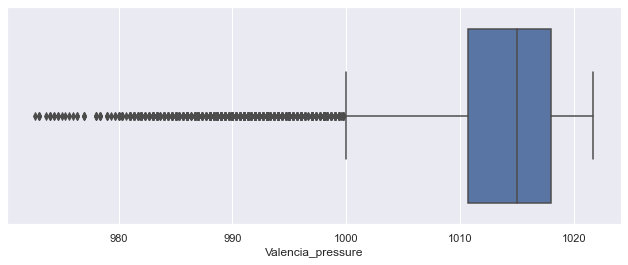

In [ ]:
# print a box plot to see what the data looks like in the valencia|_pressure column 
sns.boxplot(df['Valencia_pressure'])

### Impute missing values 

In [ ]:
# look at the median, mode and mean value of valencia_pressure to figure out if it would be a good idea to impute the values 
print('Mode')
print(df['Valencia_pressure'].mode())
print('Mean')
print(df['Valencia_pressure'].mean())
print('Median')
print(df['Valencia_pressure'].median())

Mode
0    1018.0
dtype: float64
Mean
1012.3466870428985
Median
1015.0


Turns out the median, mode and mean values of this column are all pretty similar so we impute the column

In [ ]:
#make a copy of the dataset before we make anyt changes to it  
df_clean = df
# *Impute Valencia_pressure column with the mode 
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [ ]:
# Check to see there is no more missing data from Valencia_pressure
print("Percentage of data missing from Valencia_pressure = " 
      + str(round(df_clean['Valencia_pressure'].isnull().sum() * 100 / len(df_clean),2)), ' %')

Percentage of data missing from Valencia_pressure = 0.0  %


In [ ]:
df_clean.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

### Populate Time feature for the merged dataset - additional df_test part 

Make sure all the time features are populated. In the EDA we only populated the train data with time features. 

In [ ]:
df_clean.drop(['year', 'month',
       'week', 'weekdays', 'hour'], axis = 1)

#get year,month,week,days,hours from time column and convert them to int
df_clean['year'] = pd.DatetimeIndex(df_clean['time']).year
df_clean['month'] = pd.DatetimeIndex(df_clean['time']).month
df_clean['week'] = pd.DatetimeIndex(df_clean['time']).week
df_clean['weekdays'] = pd.DatetimeIndex(df_clean['time']).weekday
df_clean['hour'] = pd.DatetimeIndex(df_clean['time']).hour

#change the datatype to float, useful for regression
df_clean['year']= df_clean['year'].astype('int')
df_clean['month']= df_clean['month'].astype('int')
df_clean['week']= df_clean['week'].astype('float')
df_clean['weekdays']= df_clean['weekdays'].astype('int')
df_clean['hour']= df_clean['hour'].astype('int')

df_clean[['year','month','week','weekdays','hour']].head()

,year,month,week,weekdays,hour
0,2015,1,1.0,3,3
1,2015,1,1.0,3,6
2,2015,1,1.0,3,9
3,2015,1,1.0,3,12
4,2015,1,1.0,3,15


In [ ]:
df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


### Engineer existing features

### Dropping noise

Unnamed comun is the same as the index - drop it 

In [ ]:
df= df.drop(['Unnamed: 0', 'time'], axis = 1)

In [ ]:
df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [ ]:
df.shape

(11683, 47)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



### Preperation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *

In [ ]:
y = df[:len(df_train)][['load_shortfall_3h']]

x = df[:len(df_train)].drop('load_shortfall_3h',axis=1)
# Ignore for now
x_train = df[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df[len(df_train):].drop('load_shortfall_3h',axis=1)

### Feature scaling - Standardisation 

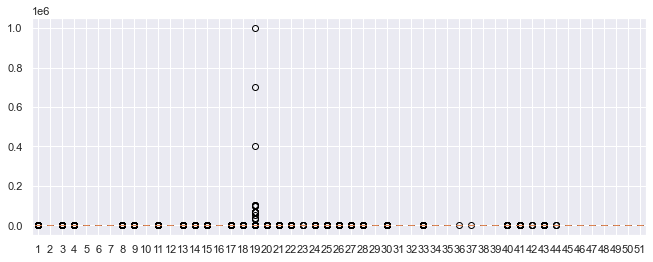

In [ ]:
#Before feature scaling
plt.boxplot(x_train)
plt.show()

In [ ]:
# Scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

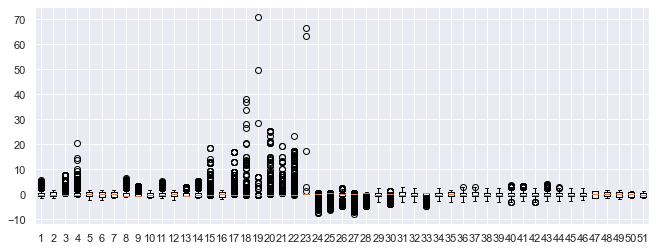

In [ ]:
#After Standardisation
plt.boxplot(x_train)
plt.show()

### Model: Linear Regression 

In [ ]:
# model 
lr = LinearRegression()

In [ ]:
# Using just the training dataset to test model accuracy 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2) 

In [ ]:
# fit model
lr.fit(x_train,y_train)
#make model predictions
preds = lr.predict(x_test)

#### Evaluate Model  -Linear Regression

In [ ]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
print('Linear Model RMSE Score:', rmse(y_test, preds))
#from sklearn.metrics import r2_score
print('R2 Score:',r2_score(y_test, preds))

Linear Model RMSE Score: 4778.6761172256765
R2 Score: 0.149590176407133


### Model: Decision Tree Regressor

In [ ]:
%%time
# create model object
dtr = DecisionTreeRegressor()

# train model
dtr.fit(x_train,y_train)

# Predict model for the test
dt_pred=dtr.predict(x_test)

#Show RMSE score
print('DecisionTreeRegressor RMSE:', sqrt(mean_squared_error(y_test, dt_pred)))
print('R2 Score:',r2_score(y_test, dt_pred))

DecisionTreeRegressor RMSE: 4916.527115972312
R2 Score: 0.09981877037616416
Wall time: 191 ms


### Model: KNeighborsRegressor

In [ ]:
%%time
# knn
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

knn_pred=knn.predict(x_test)
knn_pred

#Show RMSE score
print('KNeighborsRegressor RMSE:', sqrt(mean_squared_error(y_test, knn_pred)))
print('R2 Score:',r2_score(y_test, knn_pred))

KNeighborsRegressor RMSE: 5076.964877577502
R2 Score: 0.04011016348944518
Wall time: 173 ms


### Model: Ridge Regression

In [ ]:
%%time
#fit the model
ridge = Ridge()
ridge.fit(x_train,y_train)

ridge_pred=ridge.predict(x_test)
ridge_pred

#Show RMSE score
print('Ridge RMSE:', sqrt(mean_squared_error(y_test, ridge_pred)))
print('R2 Score:',r2_score(y_test, ridge_pred))

Ridge RMSE: 4783.081996151808
R2 Score: 0.1480213193091663
Wall time: 9.97 ms


### Model: XGBRegressor

In [ ]:
%%time
#fit the model
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

xgb_pred=xgb.predict(x_test)
xgb_pred

#Show RMSE score
print('XGBRegressor:', sqrt(mean_squared_error(y_test, xgb_pred)))
print('R2 Score:',r2_score(y_test, xgb_pred))

XGBRegressor: 3222.4619005333075
R2 Score: 0.6132871013062824
Wall time: 451 ms


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



Factors you might consider when selecting the best model:
* Model Score
* Computing time

In [ ]:
#comparing the RMSE of each fitted model
RMSE_dict = {"RMSE, R2":
             {
                 "Linear Regression": [sqrt(mean_squared_error(y_test, preds)),r2_score(y_test, preds)],
              "XGBRegressor": [sqrt(mean_squared_error(y_test, xgb_pred)),r2_score(y_test, xgb_pred)],
              "KNeighborsRegressor": [sqrt(mean_squared_error(y_test, knn_pred)),r2_score(y_test, knn_pred)],
              "Decision Tree": [sqrt(mean_squared_error(y_test, dt_pred)),r2_score(y_test, dt_pred)],
                 "Ridge Regression": [sqrt(mean_squared_error(y_test, ridge_pred)),r2_score(y_test, ridge_pred)]
             }
             
             }

#'A':['A1', 'A2', 'A3', 'A4', 'A5'], 

In [ ]:
# create dataframe from dictionary
RMSE_df = pd.DataFrame(data=RMSE_dict)

In [ ]:
RMSE_df

,"RMSE, R2"
Decision Tree,"[4916.527115972312, 0.09981877037616416]"
KNeighborsRegressor,"[5076.964877577502, 0.04011016348944518]"
Linear Regression,"[4778.6761172256765, 0.149590176407133]"
Ridge Regression,"[4783.081996151808, 0.1480213193091663]"
XGBRegressor,"[3222.4619005333075, 0.6132871013062824]"


### Hyperparameter tuning
Hyperparameters can be tuned using either RandomizedSearchCV or GridSearchCV

Use the code below to have the optimal parameters decided by 

In [ ]:
%%time
xgb = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07,0.5],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4,40],
              'seed': [1,0],
              'n_estimators': [500, 200,1]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[09:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
0.5697492159282405
{'learning_rate': 0.07, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'seed': 1}
Wall time: 1min 47s


In [ ]:
#Using the new parameters
xgb=XGBRegressor(learning_rate= 0.07, max_depth= 6, 
                 min_child_weight= 4, n_estimators= 500, 
                 nthread= 4, seed= 1) 

In [ ]:
%%time
#Fitting and training the tuned model
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
xgb_pred
print('Testing RMSE for XGBRegressor')
print('XGBRegressor:', sqrt(mean_squared_error(y_test, xgb_pred)))

Testing RMSE for XGBRegressor
XGBRegressor: 3099.959171395424
Wall time: 3.02 s


### Using the top best features 

### Importance of Feature Selection:
* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Might Improve Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

In [ ]:
#Using the top best features 
from sklearn.feature_selection import SelectKBest
# The features selected that best predict purchase price
selector = SelectKBest( k=5)
fit = selector.fit(x,y)
X_best = selector.fit_transform(x,y)
#X_best = selector.transform(X)

#Created dataframes showing top columns and their scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Feature','Score']  

#print 5 best features
Top_features= featureScores.nlargest(5,'Score')  
Top_features

C:\Users\Drikus\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Drikus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Drikus\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Drikus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,Feature,Score
22,Valencia_snow_3h,inf
18,Barcelona_pressure,25.521038
17,Bilbao_snow_3h,2.880573
2,Bilbao_rain_1h,1.631954
16,Seville_rain_1h,1.486721


In [ ]:
X_best.shape

(8763, 5)

In [ ]:
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y, test_size=0.2, random_state=50)

In [ ]:
# Feature Scaling  
X_train_best = sc.fit_transform(X_train_best)
X_test_best = sc.transform(X_test_best)

In [ ]:
xgb=XGBRegressor(learning_rate= 0.07, max_depth= 5, 
                 min_child_weight= 4, n_estimators= 500, 
                 nthread= 4, seed= 1) 

In [ ]:
%%time
xgb.fit(X_train_best,y_train_best)
xgb_pred=xgb.predict(X_test_best)
xgb_pred
print('Testing RMSE for XGBRegressor')
print('XGBRegressor:', sqrt(mean_squared_error(y_test_best, xgb_pred)))

Testing RMSE for XGBRegressor
XGBRegressor: 5227.045455646695
Wall time: 421 ms


## Making a submission

In [ ]:
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

In [ ]:
xgb.fit(x_train,y)
xgb_pred=xgb.predict(x_test)

# dtr.fit(x_train,y)
# dt_pred=dtr.predict(x_test)

In [ ]:
daf=pd.DataFrame(xgb_pred, columns=['load_shortfall_3h'])
# daf=pd.DataFrame(dt_pred, columns=['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,9398.586914
1,6910.549316
2,2797.933838
3,6942.511230
4,10075.207031


In [ ]:
output = pd.DataFrame({"time":df_test['time']})
submission = output.join(daf)        
submission.to_csv("submission.csv", index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic